In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('customer_churn.csv')
df.shape

(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID', axis='columns', inplace=True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [13]:
pd.to_numeric(df.TotalCharges, errors='coerce')  #resolving empty string

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [14]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [15]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [17]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [18]:
new_df  = df[df.TotalCharges != ' ']
new_df.shape

new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5100\3694192410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges)


In [19]:
new_df.TotalCharges.dtypes

dtype('float64')

In [20]:
tenure_churn_no = new_df[new_df.Churn == 'No'].tenure
tenure_churn_yes = new_df[new_df.Churn == 'Yes'].tenure

[]

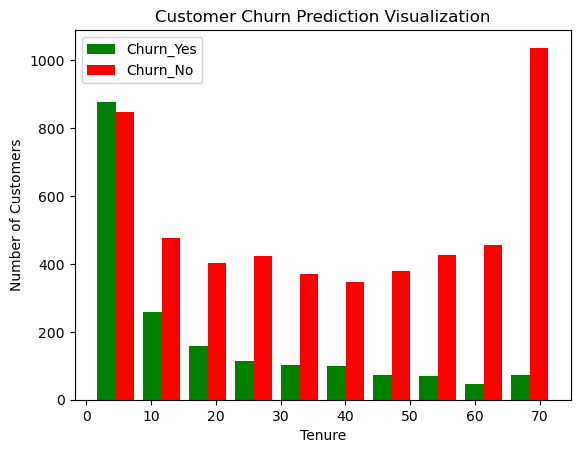

In [21]:
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_yes, tenure_churn_no], color=['g', 'r'], label=['Churn_Yes', 'Churn_No'])
plt.legend()
plt.plot()

In [22]:
mc_churn_no = new_df[new_df.Churn == 'No'].MonthlyCharges
mc_churn_yes = new_df[new_df.Churn == 'Yes'].MonthlyCharges

[]

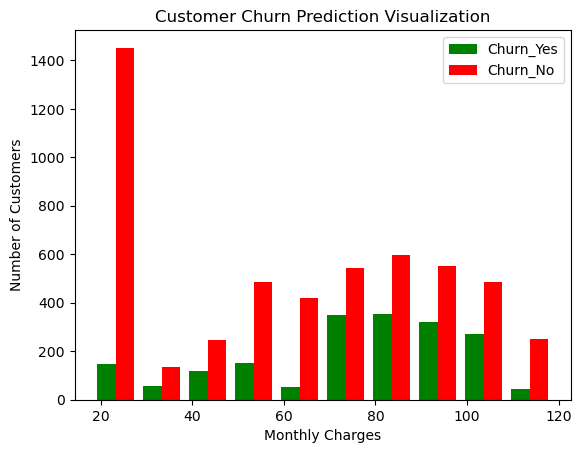

In [23]:
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([mc_churn_yes, mc_churn_no], color=['g', 'r'], label=['Churn_Yes', 'Churn_No'])
plt.legend()
plt.plot()

# Label Encoding

In [24]:
for col in new_df:
    print(f'{col}: {new_df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [25]:
def unique_vals(new_df):
    for col in new_df:

        if new_df[col].dtypes == 'object':
            print(f'{col}: {new_df[col].unique()}')

In [26]:
new_df.replace('No internet service', 'No', inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5100\4291975968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace('No internet service', 'No', inplace=True)


In [27]:
unique_vals(new_df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [28]:
new_df.replace('No phone service', 'No', inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5100\2344537308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace('No phone service', 'No', inplace=True)


In [29]:
unique_vals(new_df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [30]:
yes_no_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [31]:
for col in yes_no_cols:
    new_df[col].replace({'Yes':1, 'No':0}, inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5100\1684463467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col].replace({'Yes':1, 'No':0}, inplace=True)


In [32]:
unique_vals(new_df)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [33]:
for col in new_df:
    if new_df[col].dtypes != 'object':
        print(f'{col}: {new_df[col].unique()}')

SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [34]:
new_df['gender'].replace({'Female':1, 'Male':0}, inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5100\2266763548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['gender'].replace({'Female':1, 'Male':0}, inplace=True)


In [35]:
new_df['gender'].unique()

array([1, 0], dtype=int64)

In [36]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

new_df['InternetService'] = lbl.fit_transform(new_df['InternetService'])
new_df['Contract'] = lbl.fit_transform(new_df['Contract'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_5100\2076510997.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['InternetService'] = lbl.fit_transform(new_df['InternetService'])
C:\Users\ACER\AppData\Local\Temp\ipykernel_5100\2076510997.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Contract'] = lbl.fit_transform(new_df['Contract'])


In [37]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1


In [38]:
new_df.shape

(7032, 20)

In [42]:
new_df = pd.get_dummies(data=new_df, columns=['PaymentMethod'])
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,0,1,...,0,0,1,29.85,29.85,0,0,0,1,0
1,0,0,0,0,34,1,0,0,1,0,...,0,1,0,56.95,1889.50,0,0,0,0,1
2,0,0,0,0,2,1,0,0,1,1,...,0,0,1,53.85,108.15,1,0,0,0,1
3,0,0,0,0,45,0,0,0,1,0,...,0,1,0,42.30,1840.75,0,1,0,0,0
4,1,0,0,0,2,1,0,1,0,0,...,0,0,1,70.70,151.65,1,0,0,1,0


In [43]:
new_df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
InternetService                              int32
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
Contract                                     int32
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
PaymentMethod_Bank transfer (au

# Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()

new_df[cols_to_scale] = scaler.fit_transform(new_df[cols_to_scale])

In [45]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,0,1,...,0,0,1,0.115423,0.001275,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,0,1,0,...,0,1,0,0.385075,0.215867,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,0,1,1,...,0,0,1,0.354229,0.010310,1,0,0,0,1
3,0,0,0,0,0.619718,0,0,0,1,0,...,0,1,0,0.239303,0.210241,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,1,0,0,...,0,0,1,0.521891,0.015330,1,0,0,1,0


# Traing & Testing

In [46]:
X = new_df.drop('Churn', axis='columns')
y = new_df['Churn']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [48]:
len(X_train)

5625

In [51]:
X_train.shape

(5625, 22)

In [49]:
len(X_test)

1407

In [59]:
model = keras.Sequential([
    keras.layers.Dense(22, input_shape=(22,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5104 - accuracy: 0.7467
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.7844
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.7916
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.7915
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.7968
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4223 - accuracy: 0.7964
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.7982
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4182 - accuracy: 0.8036
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4169 - accuracy: 0.8004
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4154 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3784 - accuracy: 0.8226
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 0.8247
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8212
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8226
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8229
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3766 - accuracy: 0.8203
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8224
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.8215
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.8233
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3752 - accuracy: 

In [73]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.7910


[0.42891034483909607, 0.7910447716712952]

In [60]:
y_pred = model.predict(X_test)
y_pred[:5]

44/44 [==============================] - 0s 657us/step


array([[0.00624068],
       [0.00537963],
       [0.2551138 ],
       [0.11649445],
       [0.0455863 ]], dtype=float32)

In [61]:
y_label = []

for i in y_pred:
    if i > 0.5:
        y_label.append(1)
    else:
        y_label.append(0)

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_label))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1046
           1       0.59      0.62      0.60       361

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.73      1407
weighted avg       0.80      0.79      0.79      1407



In [63]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_label)

Text(95.72222222222221, 0.5, 'Truth')

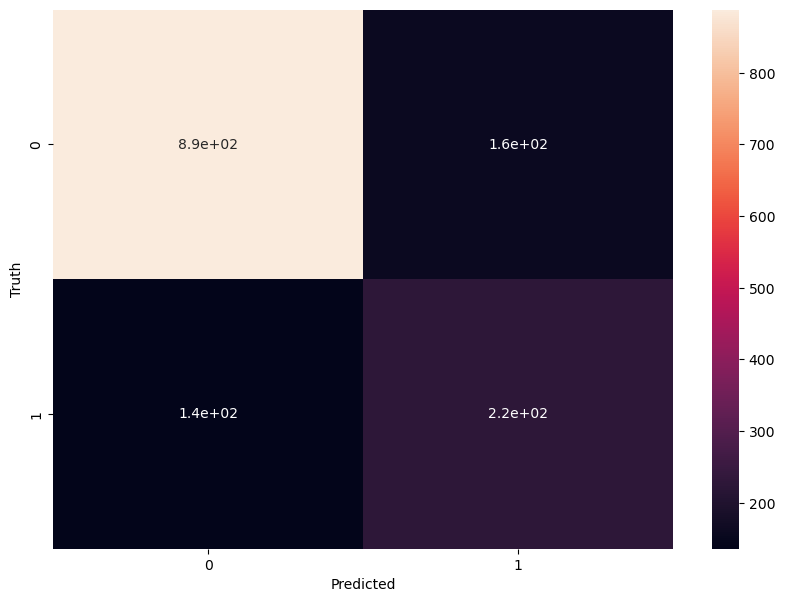

In [64]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
y_test.shape

(1407,)

# Accuracy

In [67]:
round( (8.9e+02 + 2.2e+02) / (8.9e+02 + 2.2e+02 + 1.4e+02 + 1.6e+02), 2)

0.79

# Precision for 0 class. i.e. Precision for customers who did not churn

In [71]:
round(8.9e+02/(8.9e+02 + 1.4e+02), 2)

0.86

In [72]:
round(2.2e+02/(2.2e+02 + 1.6e+02), 2)

0.58